# Chapter 7: Image Classification

## Problems

1.  Classifying **fashion-MNIST** images using machine learning models with `scikit-learn`
2.  Classifying fashion-MNIST images using deep learning models with `tensorflow/keras`
3.  Image Classification with Pre-trained models in `tensorflow.keras`
4.  Image Classification with Custom Classes using **Transfer Learning** with `pytorch`

## Problem 1: Classifying Fashion-MNIST Images using machine learning models with `scikit-learn`

In [1]:
import gzip, os, sys
import numpy as np
from scipy.stats import multivariate_normal
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Function that downloads a specified MNIST data file from zalandoresearch website
def download(filename, source='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_fashion_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_fashion_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

train_data = load_fashion_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_fashion_mnist_labels('train-labels-idx1-ubyte.gz')
test_data = load_fashion_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_fashion_mnist_labels('t10k-labels-idx1-ubyte.gz')
print(train_data.shape)
# (60000, 784) ## 60k 28x28 handwritten digits
print(test_data.shape)
# (10000, 784) ## 10k 2bx28 handwritten digits

(60000, 784)
(10000, 784)


In [4]:
products = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(len(products))

10


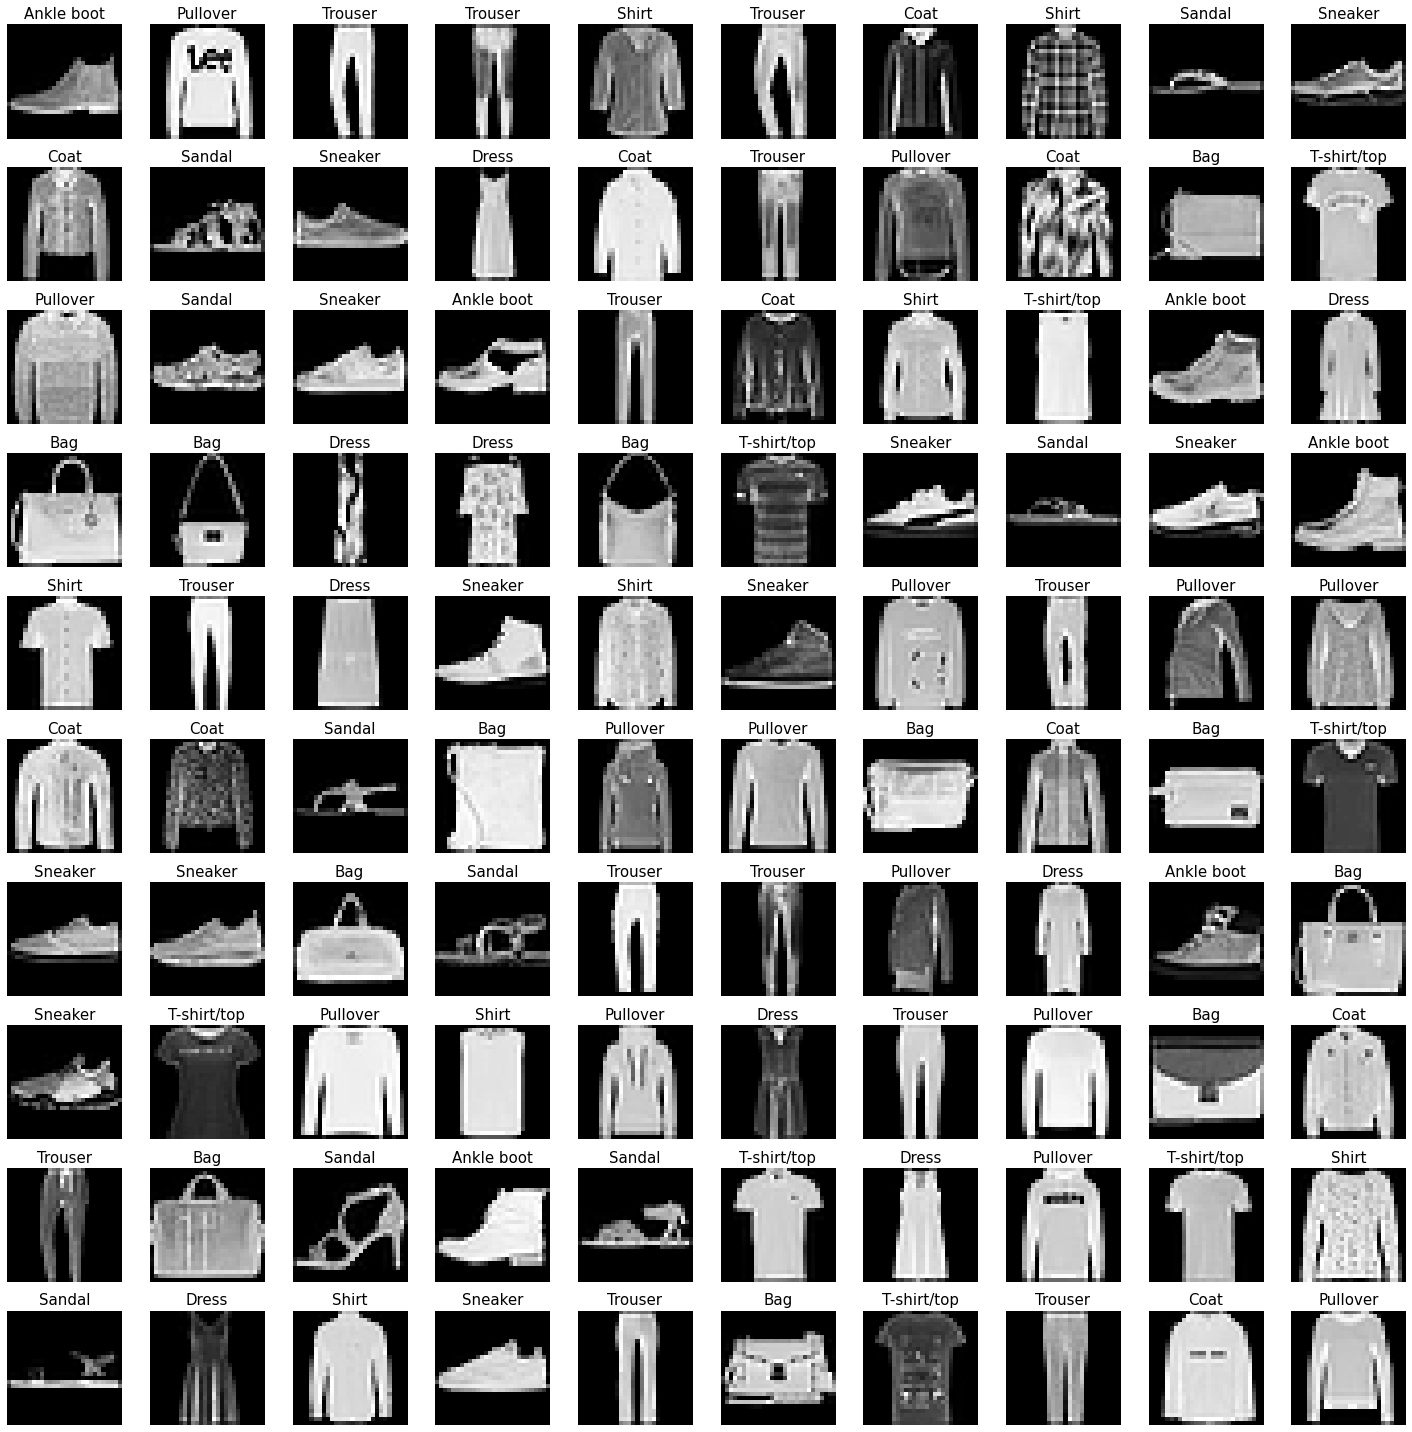

In [3]:
def show_image(x, label):
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(products[label], size=15)
    plt.axis('off')

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10, 10, i+1)
    show_image(test_data[i,:], test_labels[i])
plt.tight_layout()
plt.show()

Training Time: 0.7388112545013428 seconds


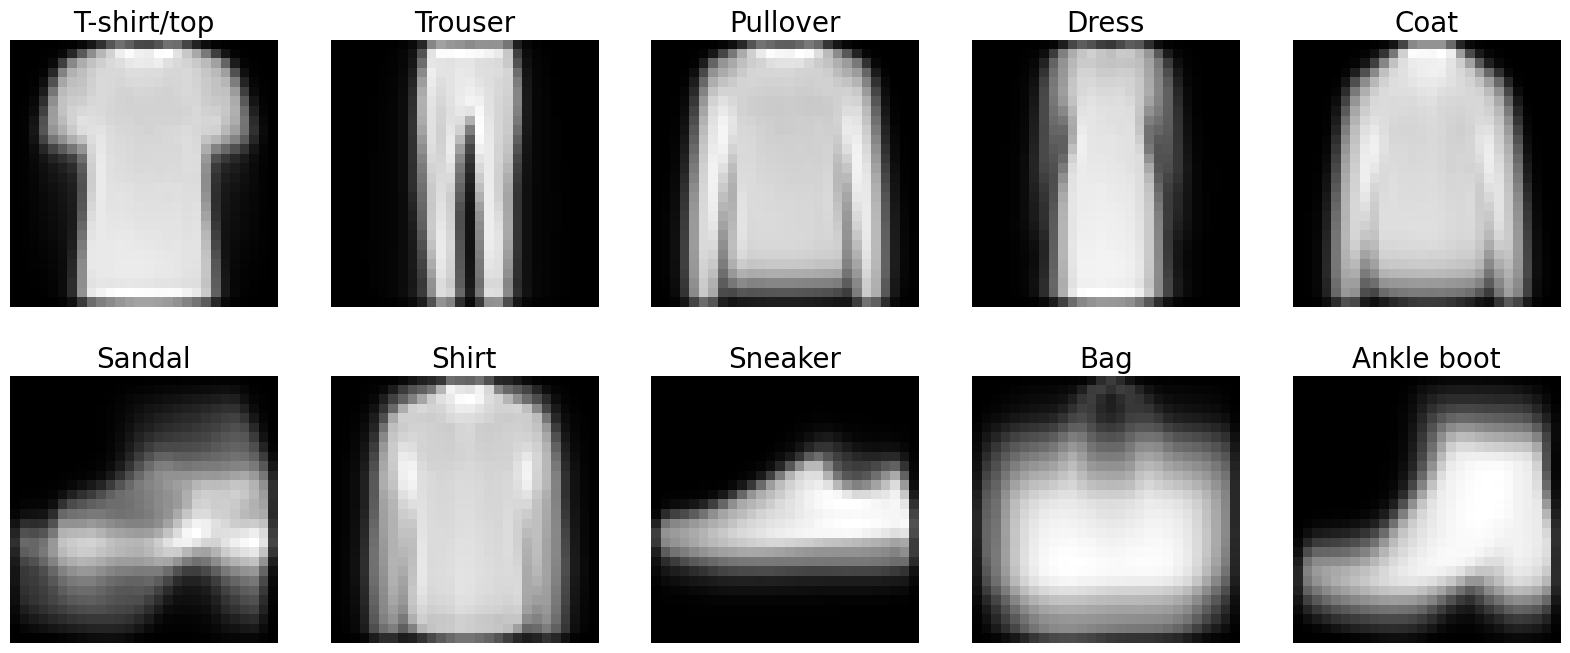

In [40]:
from time import time
from sklearn.naive_bayes import GaussianNB

start = time()
clf = GaussianNB(var_smoothing=1e-2)
clf.fit(train_data, train_labels)
end = time()
print('Training Time: {} seconds'.format(end-start))

plt.figure(figsize=(20,8))
for i in range(len(products)):
    plt.subplot(2,5,i+1), plt.imshow(np.reshape(clf.theta_[i], (28,28)), cmap=plt.cm.gray), plt.axis('off')
    plt.title(products[i], size=20)
plt.show()

In [43]:
start = time()
test_predictions = clf.predict(test_data)
end = time()
print('Prediction Time: {} seconds'.format(end-start))

errors = np.sum(test_predictions != test_labels)
print("The GaussianNB (generative model) makes " + str(errors) + " errors out of 10000")
# The generative model makes 3285 errors out of 10000
t_accuracy = sum(test_predictions == test_labels) / float(len(test_labels))
t_accuracy
# 0.6715

Prediction Time: 1.0611958503723145 seconds
The GaussianNB (generative model) makes 3285 errors out of 10000


0.6715

#### Prediction with a Linear Classifier with Stochastic Gradient Descent training from `scikit-learn`

In [6]:
from sklearn.linear_model import SGDClassifier
params = dict({"loss":"modified_huber","penalty":"l2"})
clf = SGDClassifier(**params)
start = time()
clf.fit(train_data, train_labels)
end = time()
print('Training Time: {} seconds'.format(end-start))

Training Time: 140.620023727417 seconds


In [7]:
start = time()
pred_labels = clf.predict(test_data)
end = time()
print('Prediction Time: {} seconds'.format(end-start))

Prediction Time: 0.07095885276794434 seconds


In [8]:
t_accuracy = sum(pred_labels == test_labels) / float(len(test_labels))
t_accuracy

0.7958

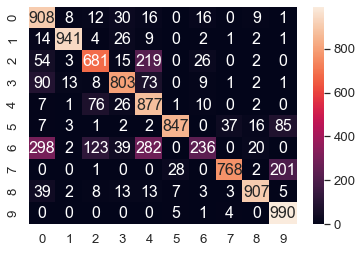

In [9]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

cm = confusion_matrix(test_labels, pred_labels)
df_cm = pd.DataFrame(cm, range(10), range(10))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8}, fmt="g")
plt.show()

#### Prediction with the RandomForest Ensemble Classifier from `scikit-learn`

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
start = time()
clf.fit(train_data, train_labels)
end = time()
print('Training Time: {} seconds'.format(end-start))

Training Time: 234.0610225200653 seconds


In [46]:
start = time()
pred_labels = clf.predict(test_data)
end = time()
print('Prediction Time: {} seconds'.format(end-start))

Prediction Time: 0.7255053520202637 seconds


In [55]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels, target_names=products))
t_accuracy = sum(pred_labels == test_labels) / float(len(test_labels))
t_accuracy

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.77      0.79      0.78      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.76      0.82      0.79      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.72      0.59      0.65      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



0.8751

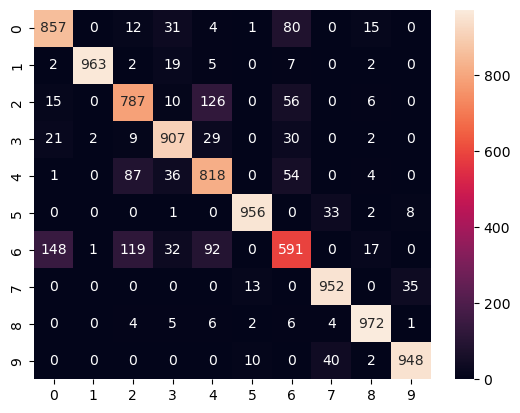

In [54]:
cm = confusion_matrix(test_labels, pred_labels)
df_cm = pd.DataFrame(cm, range(10), range(10))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10}, fmt="g")
plt.show()

1249


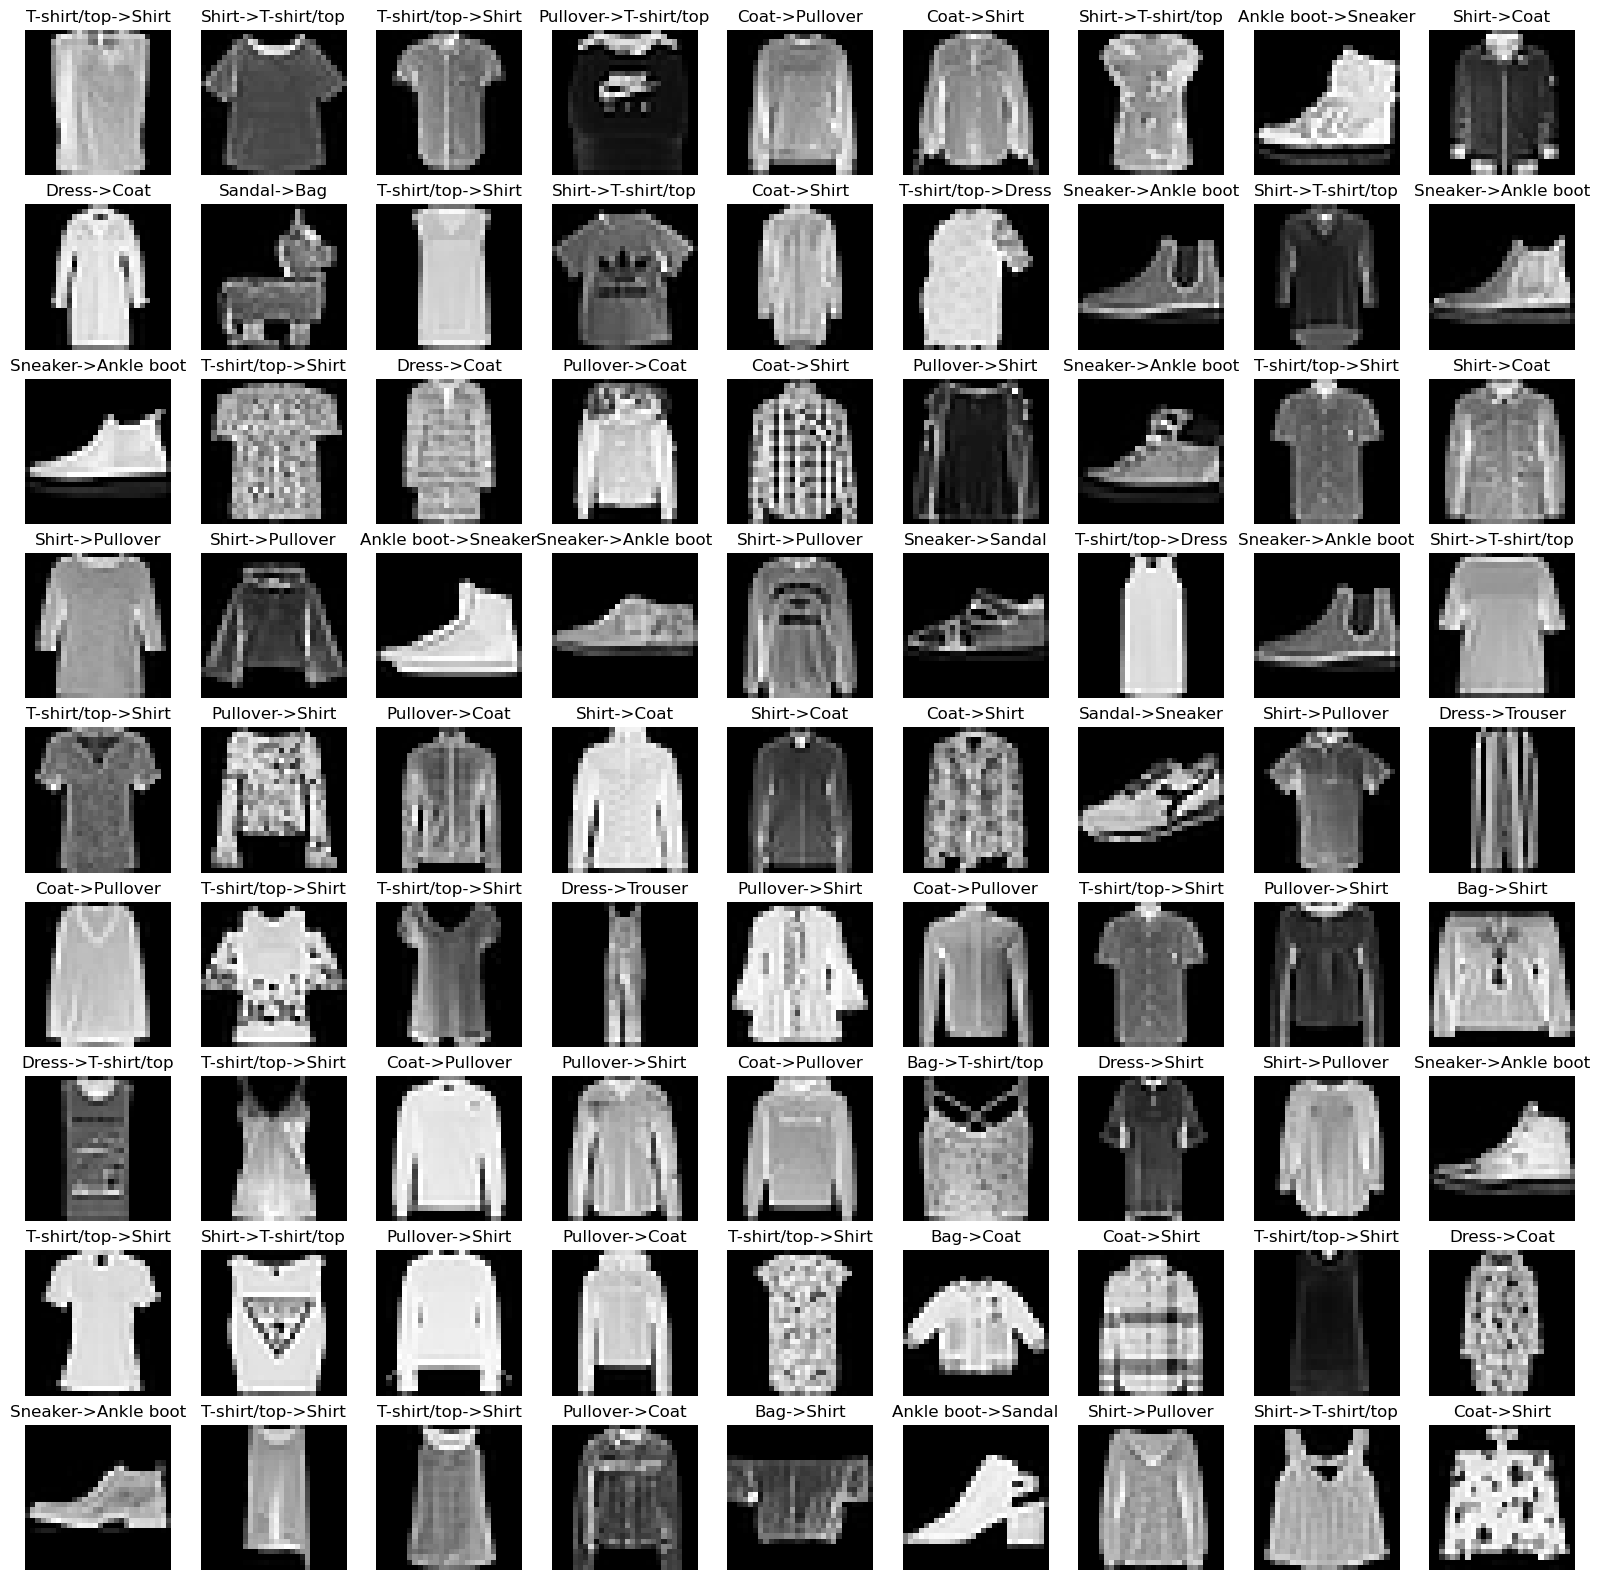

In [57]:
wrong_indices = pred_labels != test_labels
wrong_images, wrong_preds, correct_labs = test_data[wrong_indices], pred_labels[wrong_indices], test_labels[wrong_indices]
print(len(wrong_preds))
plt.figure(figsize=(20,20))
plt.gray()
j = 1
for i in np.random.choice(len(wrong_preds), 81):
    plt.subplot(9,9,j), plt.imshow(np.reshape(wrong_images[i], (28,28))), plt.axis('off')
    plt.title(products[wrong_preds[i]] + '->' + products[correct_labs[i]]) # pred, actual
    j += 1
plt.show()

## Problem 2: Classifying fashion-MNIST images using deep learning models with `tensorflow/keras`

In [1]:
# Use GPU for faster training, e.g., run on colab
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, \
                                    BatchNormalization, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib

In [2]:
# Reproducible output
tf.random.set_seed(1)

# Load and preprocess the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = \
                                                 fashion_mnist.load_data()

# Reshape and normalize the images
train_images=train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images=test_images.reshape((10000,28,28,1)).astype('float32')/255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.summary()

C:\Users\sandi\anaconda3\envs\tf-gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,789,578 (6.83 MB)

 Trainable params: 1,789,578 (6.83 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, \
                                                     validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7330 - loss: 0.7218 - val_accuracy: 0.8777 - val_loss: 0.3382
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8709 - loss: 0.3522 - val_accuracy: 0.8942 - val_loss: 0.2883
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8888 - loss: 0.3039 - val_accuracy: 0.9021 - val_loss: 0.2642
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8994 - loss: 0.2701 - val_accuracy: 0.9073 - val_loss: 0.2491
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9099 - loss: 0.2489 - val_accuracy: 0.9104 - val_loss: 0.2413


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9050 - loss: 0.2609
Test accuracy: 0.9069


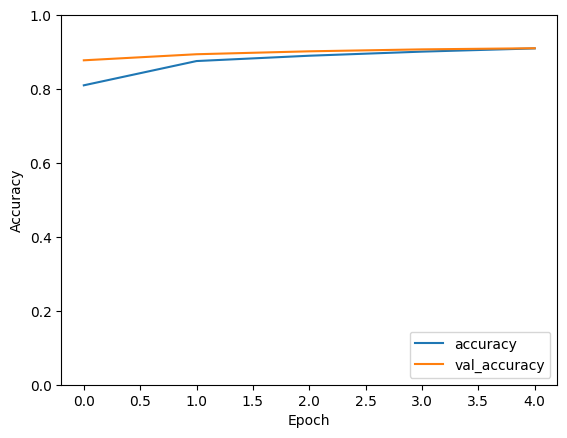

In [4]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')
#Test accuracy: 0.9030

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Problem 3: Image Classification with Pre-trained models in `tensorflow.keras`

In [14]:
import keras
print(keras.__version__)
import numpy as np
from keras.applications import vgg16, vgg19, inception_v3, resnet50, mobilenet, xception
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import cv2

2.0.8


In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
vgg16_model = vgg16.VGG16(weights='imagenet') #None
#vgg_model.load_weights('models\\vgg16_weights_tf_dim_ordering_tf_kernels.h5')
vgg16_model.summary()
vgg19_model = vgg19.VGG19(weights='imagenet')
#vgg19_model.summary()
inception_model = inception_v3.InceptionV3(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
mobilenet_model = mobilenet.MobileNet(weights='imagenet')
xception_model = xception.Xception(weights='imagenet')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [40]:
vgg16_model.__call__

<bound method Layer.__call__ of <keras.engine.training.Model object at 0x000001FEC0173DC8>>

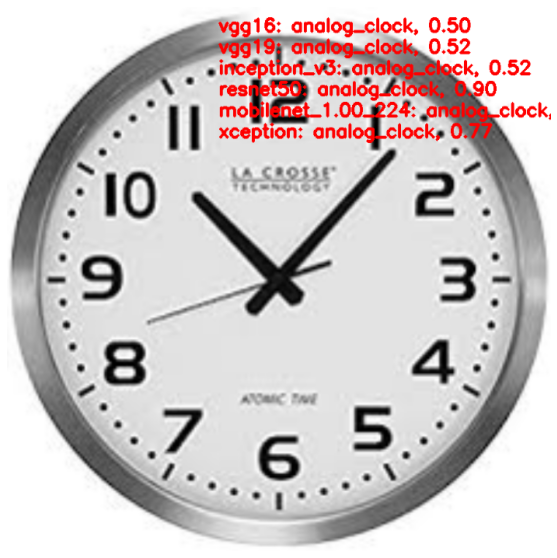

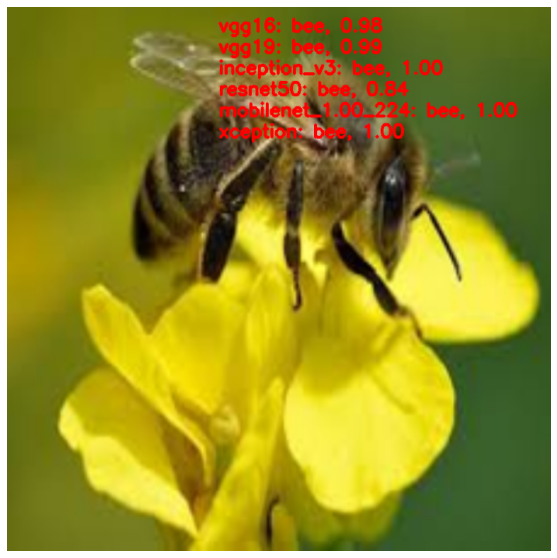

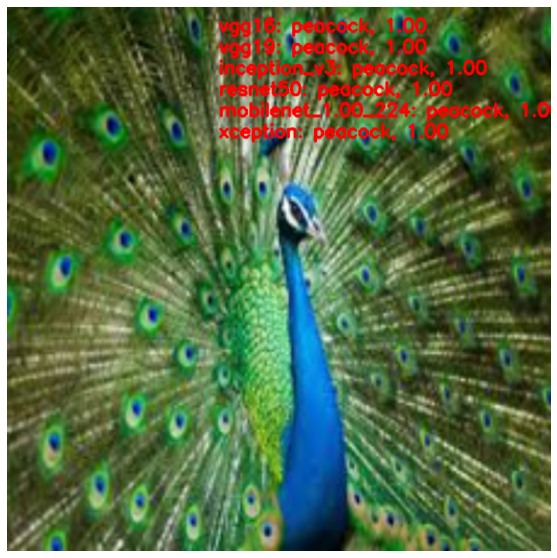

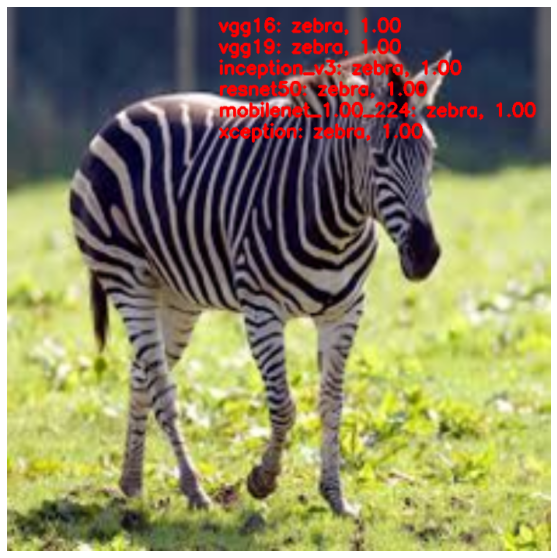

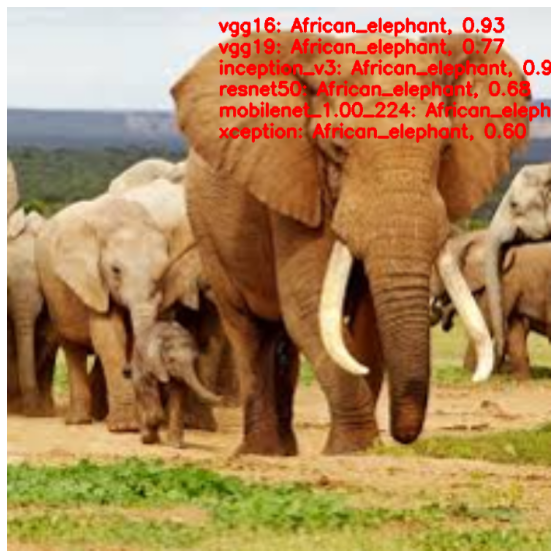

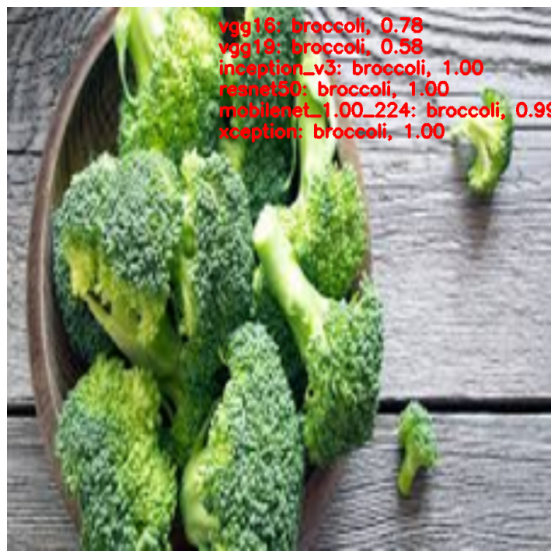

In [42]:
modules = [vgg16, vgg19, inception_v3, resnet50, mobilenet, xception]
models = [vgg16_model, vgg19_model, inception_model, resnet_model, mobilenet_model, xception_model]

for img in ['Img_05_01.jpg', 'Img_05_02.jpg', 'Img_05_03.jpg', 'Img_05_04.jpg', 'Img_05_05.jpg', 'Img_05_06.jpg']:
    
    img = 'images/' + img
    # load an image in PIL format
    original = load_img(img, target_size=(224, 224))

    # convert the PIL image to a numpy array
    # IN PIL - image is in (width, height, channel)
    # In Numpy - image is in (height, width, channel)
    numpy_image = img_to_array(original)

    # Convert the image / images into batch format
    # expand_dims will add an extra dimension to the data at a particular axis
    # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
    # Thus we add the extra dimension to the axis 0.
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    labels = {}    
    for i in range(len(modules)):
        module, model = modules[i], models[i]
        # prepare the image for the VGG model
        processed_image = module.preprocess_input(image_batch.copy())
        # get the predicted probabilities for each class
        predictions = model.predict(processed_image)
        # print predictions
        # convert the probabilities to class labels
        # We will get top 5 predictions which is the default
        labels[model.name] = decode_predictions(predictions)

    numpy_image = np.uint8(img_to_array(original)).copy()
    numpy_image = cv2.resize(numpy_image,(900,900))
    y = 40
    for model in models:
        cv2.putText(numpy_image, "{}: {}, {:.2f}".format(model.name, labels[model.name][0][0][1], labels[model.name][0][0][2]), \
                    (350, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
        y += 35
    numpy_image = cv2.resize(numpy_image, (700,700))
    plt.figure(figsize=[10,10])
    plt.imshow(numpy_image)
    plt.axis('off')
    plt.show()

## Problem 4: Image Classification with Custom Classes using Transfer Learning with `pytorch`

In [1]:
# !tar -xvf /content/drive/MyDrive/256_ObjectCategories.tar
# !mkdir images/goat
# !mkdir images/elk
# !mkdir images/raccoon
# !cp -r 256_ObjectCategories/085.goat/* images/goat
# !cp -r 256_ObjectCategories/065.elk/* images/elk
# !cp -r 256_ObjectCategories/168.raccoon/* images/raccoon

In [53]:
import numpy as np
import os
import shutil
from shutil import copyfile
    
def create_training_validation_dataset():
    classes = ['raccoon', 'goat', 'elk']
    if not os.path.exists('images/train'):
        os.makedirs('images/train')
    for label in classes:
        if not os.path.exists(os.path.join('images/train', label)):
            os.makedirs(os.path.join('images/train', label))  
        #shutil.rmtree(os.path.join('images/train', label))

    if not os.path.exists('images/valid'):
        os.makedirs('images/valid')
    for label in classes:
        if not os.path.exists(os.path.join('images/valid', label)):
            os.makedirs(os.path.join('images/valid', label))           
        #shutil.rmtree(os.path.join('images/valid', label))
     
    for label in classes:
        images = os.listdir(os.path.join('images/', label))
        train_indices = np.random.choice(len(images), int(0.8*len(images)), replace=False)
        valid_indices = list(set(range(len(images))) - set(train_indices))
        print(len(images), len(train_indices), len(valid_indices))
        for index in train_indices:
            copyfile(os.path.join('images/', label, images[index]), os.path.join('images/train/', label, images[index]))
        for index in valid_indices:
            copyfile(os.path.join('images/', label, images[index]), os.path.join('images/valid/', label, images[index]))
            
create_training_validation_dataset()

140 112 28
112 89 23
101 80 21


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'images'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [80]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.axis('off')
    if title is not None:
        plt.title(title)
    #plt.pause(0.001)  # pause a bit so that plots are updated

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


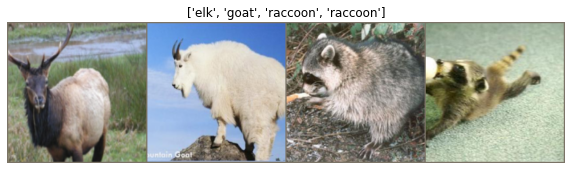

In [56]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
plt.figure(figsize=(10,5))
imshow(out, title=[class_names[x] for x in classes])

In [57]:
class_names, classes

(['elk', 'goat', 'raccoon'], tensor([0, 1, 2, 2]))

In [58]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [93]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(8,12))
    plt.subplots_adjust(0,0,1,0.925,0.05,0.08)
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                plt.subplot(num_images//2, 2, images_so_far)
                plt.axis('off')
                plt.title('{}'.format(class_names[preds[j]]), size=15)
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    plt.suptitle('predicted with Resnet18 using transfer learning', size=20)
                    plt.show()
                    return
        #model.train(mode=was_training)    

In [60]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 3)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.0001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [61]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_che

train Loss: 0.9702 Acc: 0.5409
valid Loss: 0.6634 Acc: 0.7778

Epoch 1/24
----------
train Loss: 0.7686 Acc: 0.6690
valid Loss: 0.4613 Acc: 0.8611

Epoch 2/24
----------
train Loss: 0.6890 Acc: 0.7082
valid Loss: 0.3456 Acc: 0.9028

Epoch 3/24
----------
train Loss: 0.6743 Acc: 0.7189
valid Loss: 0.2973 Acc: 0.9167

Epoch 4/24
----------
train Loss: 0.6245 Acc: 0.7509
valid Loss: 0.2787 Acc: 0.9306

Epoch 5/24
----------
train Loss: 0.5525 Acc: 0.7758
valid Loss: 0.2456 Acc: 0.9167

Epoch 6/24
----------
train Loss: 0.5350 Acc: 0.8256
valid Loss: 0.2544 Acc: 0.9028

Epoch 7/24
----------
train Loss: 0.5011 Acc: 0.8149
valid Loss: 0.2778 Acc: 0.8889

Epoch 8/24
----------
train Loss: 0.5680 Acc: 0.7900
valid Loss: 0.2211 Acc: 0.9583

Epoch 9/24
----------
train Loss: 0.4973 Acc: 0.8327
valid Loss: 0.2372 Acc: 0.9167

Epoch 10/24
----------
train Loss: 0.5023 Acc: 0.8185
valid Loss: 0.2807 Acc: 0.8889

Epoch 11/24
----------
train Loss: 0.5152 Acc: 0.8007
valid Loss: 0.2132 Acc: 0.9444



In [62]:
torch.save(model_ft.state_dict(), 'models/resnet18_trans_learn.pth')

In [63]:
model_ft.load_state_dict(torch.load('models/resnet18_trans_learn.pth', map_location='cpu'))
model_ft.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


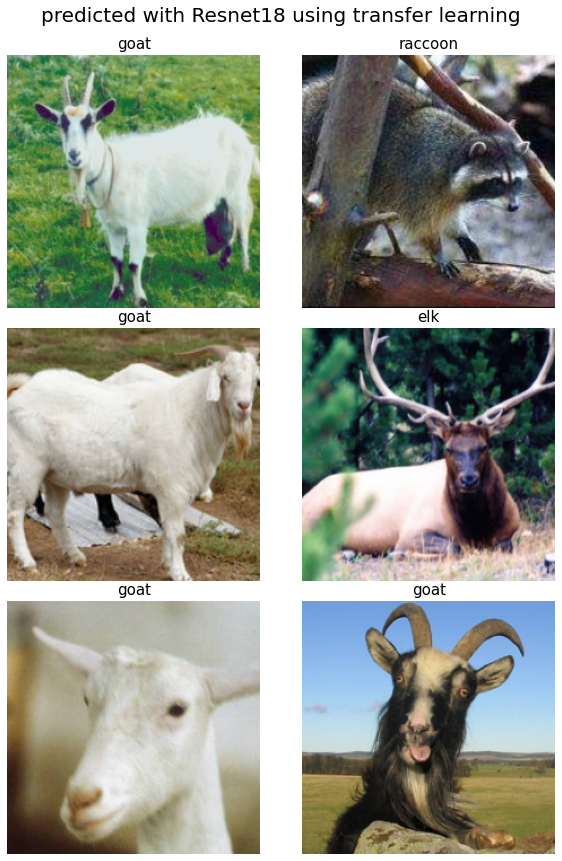

In [94]:
visualize_model(model_ft)

### Testing with unseen images

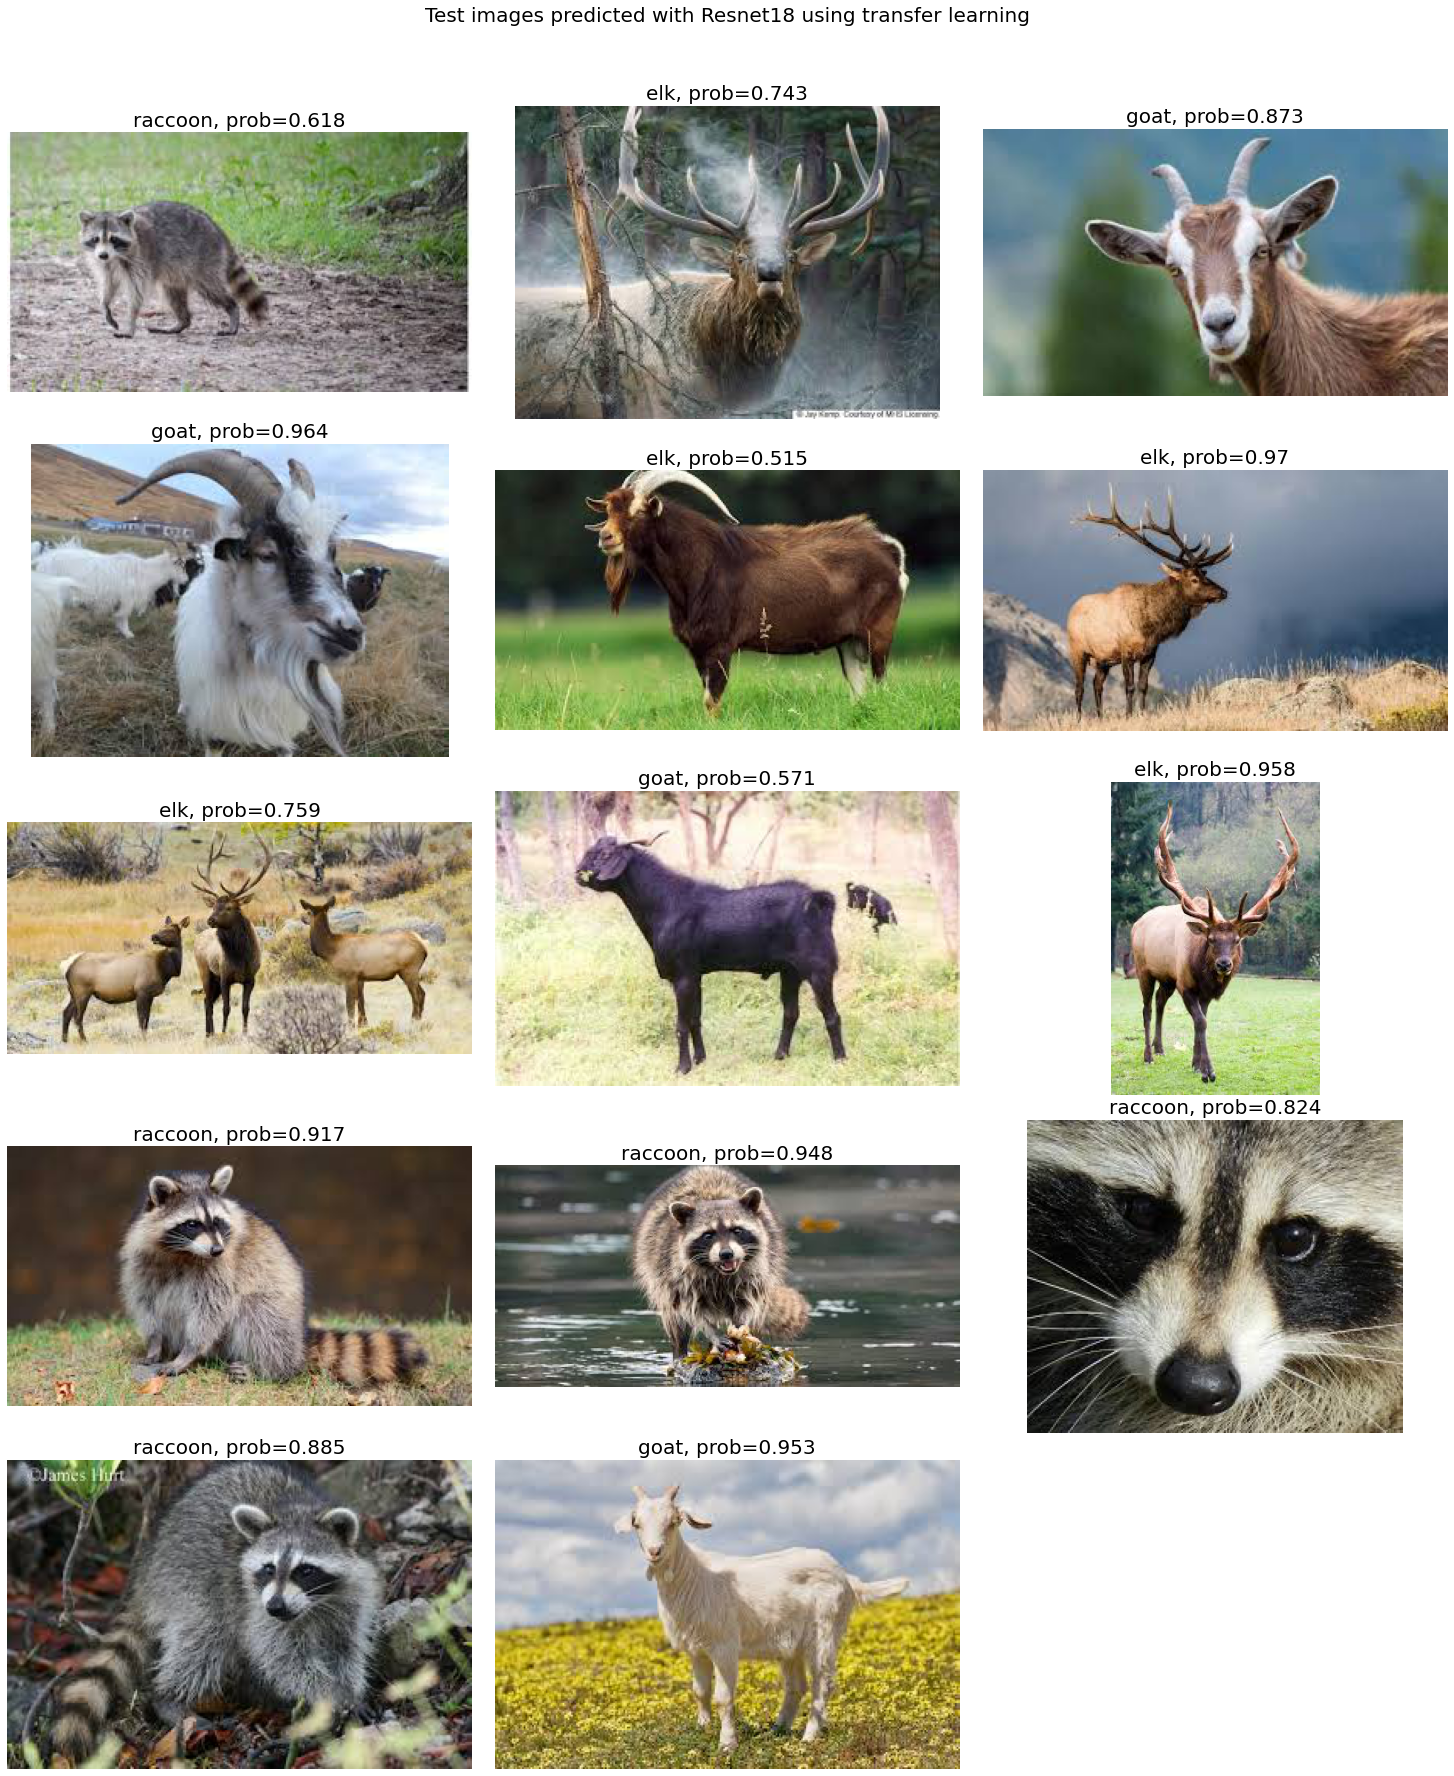

In [102]:
from PIL import Image
import glob
import torch.nn.functional as F
from torch.autograd import Variable
loader =  transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
plt.figure(figsize=(20,25))
plt.subplots_adjust(0,0,1,0.925,0.05,0.08)
plt.suptitle('Test images predicted with Resnet18 using transfer learning', size=20)
          
i = 1
for img in glob.glob('images/test/*.jpg'):
    image = Image.open(img)
    #print(image.size)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0) 
    #print(image.shape)
    out = model_ft(image.to(device))
    y_prob = F.softmax(out, dim=1)
    #pred = out.max(1) 
    prob, pred = torch.max(y_prob, 1)
    #print(y_prob.data.numpy(), class_names[pred], prob.data.numpy())
    plt.subplot(5,3,i), plt.imshow(Image.open(img)), plt.axis('off'), plt.title('{}, prob={:.4g}'.format(class_names[pred], round(prob.data.cpu().numpy()[0],3)), size=20)
    i += 1
plt.show()

In [2]:
#! pip install torchviz
#from torchviz import make_dot
#make_dot(out)

## Questions

1. We achieved $~90\%$ test accuracy for the fashion-MINST classification with deep learning model with `tensorflow` / `keras`. Can you improve the accuracy of the model to $95\%$?

   **Hint**: Here are the things you can try:
   * Change the neural net architecture, e.g., use **CNN** instead, or use additional layers / functions (e.g., **Batch Normalization** or **Global Avverga Pooling**, refer to this implementation: https://secantzhang.github.io/blog/deep-learning-fashion-mnist, it uses `keras` **functional API** to define the model).
   * Use **data augmentation** (i.e., create modified copies of training data, e.g., rotated, shifted, flipped images, to increase diversity and help the model generalize better).
   * Use **regularization** to prevent overfitting.
   * Use **early stopping**, **learning rate scheduling**.

    Now, Can you implement the model using `pytorch` instead?

1. Can the popular pretrained models be used to classify fashion-MNIST images? If yes, how? Use transfer-learning/fine-tuning (for example, freeze last few layers of the models and train on fashion-MNIST to update weights) to classify the images and compare the relative performances of the models against number of training epochs. You should obtain a figure like the one from the paper https://www.researchgate.net/figure/Comparison-of-the-accuracy-rate-in-the-Fashion-MNIST-dataset_fig5_351955214, as shown:

    ![](images/acc.png)

3.	For the problem transnfer learning with pytorch, train the model by updating all the weight parameters of the CNN (without freezing any layer). Does the validation accuracy improve? Do some hyperparameter tuning (for example, change epoch, learning rate, batch size and so on) to observe the impact on validation accuracy.


### References

1. https://www.youtube.com/watch?v=CgLp7cW5QJU 
2. https://www.youtube.com/watch?v=Wq_vAWQ0Y_w
3. https://www.youtube.com/watch?v=xr_wpaGxlTk
4. https://www.youtube.com/watch?v=w5nHj1e5nfI
5. https://www.youtube.com/watch?v=2xNXWy7ubKs